# Library

In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt

import torchvision.utils as utils
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Set torch basic

In [2]:
# CUDA Check
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

# Set dtype
dtype = torch.double

# Load the data

In [3]:
mnist_train = datasets.MNIST(
    root='data/',
    train=True,
    download=True)

mnist_test = datasets.MNIST(
    root='data/',
    train=False,
    download=True)


print(mnist_train)
print(mnist_test)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train
Dataset MNIST
    Number of datapoints: 10000
    Root location: data/
    Split: Test


# Analyze MNIST data

Train data shape :  torch.Size([60000, 28, 28])
Train label shape :  torch.Size([60000])
Test data shape :  torch.Size([10000, 28, 28])
Test label shape :  torch.Size([10000])


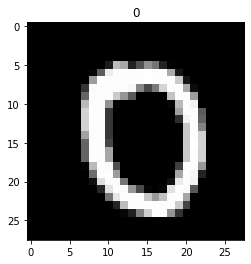

0's image data

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  27, 188, 167,  34,
          82, 144, 116,  34,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,  

In [4]:
# Rename tensors
X_train = mnist_train.data
y_train = mnist_train.targets
X_test = mnist_test.data
y_test = mnist_test.targets

# Check the shape of data and labels
print("Train data shape : ", X_train.shape)
print("Train label shape : ", y_train.shape)
print("Test data shape : ", X_test.shape)
print("Test label shape : ", y_test.shape)

# Show a image example
idx = np.random.randint(0, X_train.size(0))
plt.figure()
plt.imshow(X_train[idx], cmap="gray")
plt.title(str(y_train[idx].numpy()))
plt.show()

# Show image with computer's perspective
print(str(y_train[idx].numpy()) + "'s image data\n")
print(X_train[idx])

# Convert data to double tensor
X_train = X_train.to(dtype=dtype, device=device)
y_train = y_train.to(device=device)
X_test = X_test.to(dtype=dtype, device=device)
y_test = y_test.to(device=device)

# Data vectorization and normalization

In [5]:
# DO NOT EXECUTE THIS CELL REPEATEDLY! UNEXPECTED RESULTS CAN BE SHOWN!
# Calculate vector size
def calculate_vector_size(data_size):
    size = 1
    for s in data_size:
        size *= s   
    return size

# Normalize with minimax normalizer
def normalize(data, min_value, max_value):
    return (data - min_value) / (max_value - min_value)

# Check data shape
shape = X_train.shape[1:] # 0 index is number of data
print("Data shape : ", shape)

# Vectorize the data
X_train = X_train.view(-1, calculate_vector_size(shape)) # Actually this is 28 * 28
X_test = X_test.view(-1, calculate_vector_size(shape)) # Same!

# Normalized the data
# Each pixel has 0 ~ 255 value for their intensivity
X_train = normalize(X_train, 0, 255)
X_test = normalize(X_test, 0, 255)

# Check changes on data
idx = np.random.randint(0, y_train.shape[0])
print(str(idx + 1) + "th data in X_train\n", X_train[idx])

Data shape :  torch.Size([28, 28])
44693th data in X_train
 tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.00

# How to make one-hot vector

In [6]:
# Generate 10 x 10 identity matrix
print("10 x 10 identity matrix \n", torch.eye(10))

# Sparse label
sparse_label = torch.tensor([1, 3, 5, 7, 9])
print("Sparse label \n", sparse_label)

# Sparse label -> one-hot vector
print("One-hot vector \n", torch.eye(10)[sparse_label]) # Output is double tensor

# Simple method
print("One-hot vector (Simple version) \n", torch.nn.functional.one_hot(sparse_label)) # Output is long tensor

# Change the labels to one hot vector without torch.nn.functional
y_train_one_hot = torch.eye(10)[y_train].to(dtype=dtype, device=device)
y_test_one_hot = torch.eye(10)[y_test].to(dtype=dtype, device=device)

# Check the changes
print("train label one hot vector's shape : ", y_train_one_hot.shape)
idx = np.random.randint(0, y_train.shape[0])
print("train one hot vector example, " + str(idx) + "th label")
print(y_train_one_hot[idx])

print("test label one hot vector's shape : ", y_test_one_hot.shape)
idx = np.random.randint(0, y_test.shape[0])
print("test one hot vector example, " + str(idx) + "th label")
print(y_test_one_hot[idx])


10 x 10 identity matrix 
 tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])
Sparse label 
 tensor([1, 3, 5, 7, 9])
One-hot vector 
 tensor([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])
One-hot vector (Simple version) 
 tensor([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 

# Set hyperparameters

In [7]:
learning_rate = 0.3
training_epochs = 100
display_step = 10

D_in = calculate_vector_size(shape)
D_out = 10 # number of class

# Construct the model

In [8]:
# Construct the model
class LogisticModel(torch.nn.Module):
    def __init__(self, D_in, D_out):
        super(LogisticModel, self).__init__()
        self.linear = torch.nn.Linear(in_features=D_in, out_features=D_out)
        self.softmax = torch.nn.Softmax(dim = 1)
    
    def forward(self, x):
        output = self.linear(x)
        output = self.softmax(output)
        return output
    
# Define the loss using one-hot vector
class Cross_Entropy_Loss(torch.nn.Module):
    def __init__(self):
        super(Cross_Entropy_Loss, self).__init__()
    def forward(self, y_pred, y):
        # Loss for each example
        loss = torch.sum(-1 * y * torch.log(y_pred), axis=1)
        # Mean loss
        loss = torch.mean(loss)
        return loss
    
# Define the model
model = LogisticModel(D_in, D_out).to(dtype=dtype, device=device)
criterion = Cross_Entropy_Loss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Train the model

In [9]:
losses = []

print("Training...")

for epoch in range(training_epochs):
    optimizer.zero_grad()
    
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train_one_hot)

    losses.append(loss.item())
    
    if (epoch + 1) % display_step == 0:
        print("step " + str(epoch+1) + ": ", losses[-1])
    
    loss.backward()
    optimizer.step()
    
print("Finish training")

Training...
step 10:  1.037371311637308
step 20:  0.7507831104449724
step 30:  0.6374484067267825
step 40:  0.5747481327616889
step 50:  0.5340892062813013
step 60:  0.505166707376562
step 70:  0.48330764911225715
step 80:  0.4660662848479799
step 90:  0.45202955469493855
step 100:  0.4403195798385588
Finish training


# Plot the loss

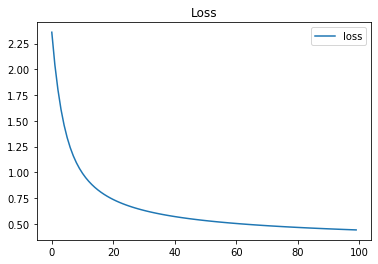

In [10]:
plt.figure()
plt.plot(losses, label="loss")
plt.title("Loss")
plt.legend()
plt.show()

# Check the accuracy

In [12]:
with torch.no_grad():
    test_corrects = 0
    test_total = 0
    
    outputs = model(X_test)
    _, predictions = torch.max(outputs, axis=1)
    test_corrects += (y_test == predictions).sum().item()
    test_total += X_test.size(0)
    print("Test accuracy : ", (test_corrects / test_total) * 100, "%")

Test accuracy :  89.23 %


# Confusion matrix

In [13]:
# confusion_matrix's input is numpy object!
from sklearn.metrics import confusion_matrix

with torch.no_grad():
    y_test_pred_probability = model(X_test)
    y_test_pred = torch.argmax(y_test_pred_probability, axis=1)
    
    print("Predicted label results")
    print(y_test_pred)
    print("Target label results")
    print(y_test)
    
    print("Confusion matrix result")
    print(confusion_matrix(y_test.cpu().numpy(), y_test_pred.cpu().numpy()))

Predicted label results
tensor([7, 2, 1,  ..., 4, 8, 6], device='cuda:0')
Target label results
tensor([7, 2, 1,  ..., 4, 5, 6], device='cuda:0')
Confusion matrix result
[[ 956    0    2    3    0    1   10    1    7    0]
 [   0 1102    2    4    1    2    4    0   20    0]
 [  13    9  869   26   19    0   20   23   45    8]
 [   6    1   18  890    1   34    7   16   24   13]
 [   1    6    5    0  898    1   12    1    8   50]
 [  19    8    4   48   17  710   21    7   45   13]
 [  16    3    8    2   13   18  890    1    7    0]
 [   2   23   35    2   13    0    1  903    5   44]
 [   9   10   11   31    9   29   14   14  830   17]
 [  11    8   10   11   46   16    0   24    8  875]]


# Prediction examples

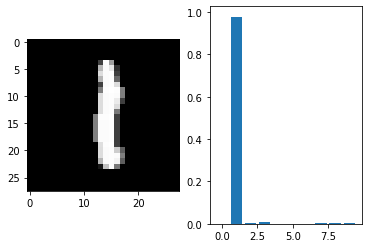

Predicted Probability 
 tensor([[2.6931e-05, 9.7739e-01, 3.1856e-03, 1.0149e-02, 2.3354e-04, 8.0615e-04,
         8.2746e-04, 1.4531e-03, 4.3226e-03, 1.6012e-03]], device='cuda:0',
       dtype=torch.float64)
Predicted label :  1
True label :  1


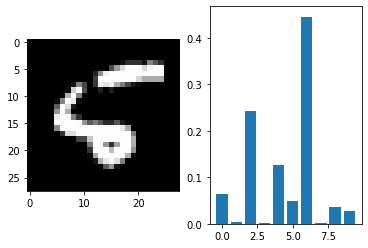

Predicted Probability 
 tensor([[0.0638, 0.0042, 0.2429, 0.0010, 0.1271, 0.0488, 0.4451, 0.0025, 0.0359,
         0.0286]], device='cuda:0', dtype=torch.float64)
Predicted label :  6
True label :  5


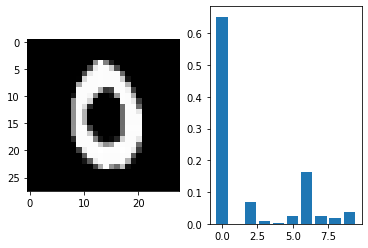

Predicted Probability 
 tensor([[6.5249e-01, 1.8469e-05, 6.9222e-02, 8.9536e-03, 1.3763e-03, 2.3566e-02,
         1.6311e-01, 2.5659e-02, 1.9419e-02, 3.6189e-02]], device='cuda:0',
       dtype=torch.float64)
Predicted label :  0
True label :  0


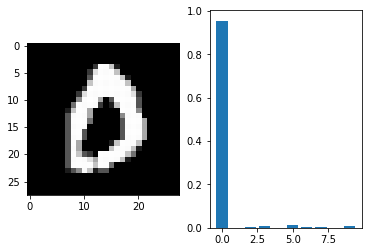

Predicted Probability 
 tensor([[9.5572e-01, 1.6722e-06, 3.0864e-03, 1.0506e-02, 3.2444e-04, 1.4343e-02,
         2.8178e-03, 4.4603e-03, 7.8027e-04, 7.9593e-03]], device='cuda:0',
       dtype=torch.float64)
Predicted label :  0
True label :  0


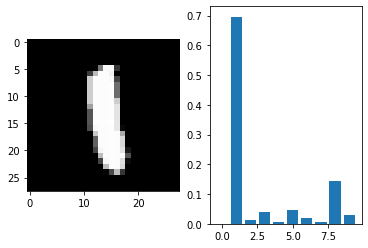

Predicted Probability 
 tensor([[1.0559e-04, 6.9598e-01, 1.1370e-02, 4.0704e-02, 4.6416e-03, 4.5398e-02,
         2.0248e-02, 6.8888e-03, 1.4480e-01, 2.9867e-02]], device='cuda:0',
       dtype=torch.float64)
Predicted label :  1
True label :  1


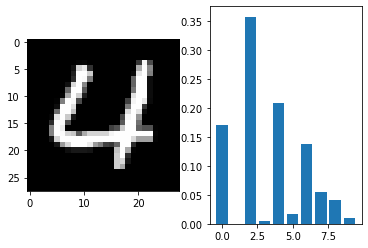

Predicted Probability 
 tensor([[1.6992e-01, 2.4626e-04, 3.5750e-01, 4.0039e-03, 2.0854e-01, 1.6326e-02,
         1.3820e-01, 5.4264e-02, 4.1381e-02, 9.6153e-03]], device='cuda:0',
       dtype=torch.float64)
Predicted label :  2
True label :  4


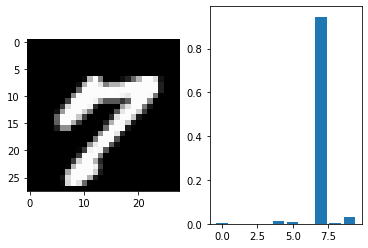

Predicted Probability 
 tensor([[4.5500e-03, 1.2507e-05, 2.2275e-05, 7.8205e-05, 1.1077e-02, 7.6225e-03,
         3.2955e-05, 9.4546e-01, 1.5823e-03, 2.9560e-02]], device='cuda:0',
       dtype=torch.float64)
Predicted label :  7
True label :  7


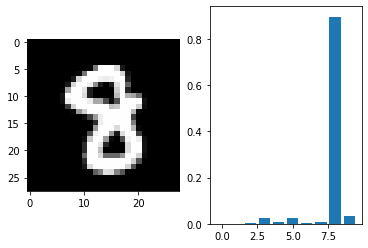

Predicted Probability 
 tensor([[1.4572e-04, 4.8464e-04, 4.3766e-03, 2.4442e-02, 7.1902e-03, 2.3806e-02,
         1.6079e-03, 7.5309e-03, 8.9661e-01, 3.3803e-02]], device='cuda:0',
       dtype=torch.float64)
Predicted label :  8
True label :  8


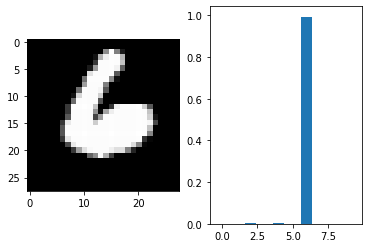

Predicted Probability 
 tensor([[5.2475e-05, 4.9928e-07, 1.6290e-03, 1.7821e-06, 4.3221e-03, 5.4480e-05,
         9.9324e-01, 2.7578e-06, 2.3618e-04, 4.5834e-04]], device='cuda:0',
       dtype=torch.float64)
Predicted label :  6
True label :  6


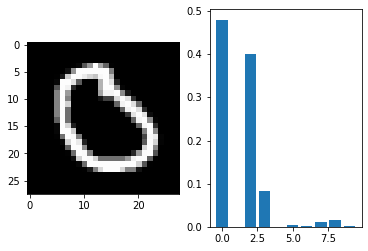

Predicted Probability 
 tensor([[4.7995e-01, 6.4217e-04, 4.0136e-01, 8.3663e-02, 2.7604e-04, 3.9416e-03,
         1.6802e-03, 1.1486e-02, 1.5355e-02, 1.6436e-03]], device='cuda:0',
       dtype=torch.float64)
Predicted label :  0
True label :  0


In [14]:
# Show 10 prediction examples
with torch.no_grad():
    for i in range(10):
        # Make random index
        idx = np.random.randint(0, y_test.shape[0])
        # Make a prediction
        y_test_pred_probability = model(X_test[idx].unsqueeze(dim=0))
        y_test_pred = torch.argmax(y_test_pred_probability, axis=1)
        
        # Show a image
        _, (ax1, ax2) = plt.subplots(1, 2)
        
        ax1.imshow(X_test[idx].cpu().view(shape), cmap="gray")
        ax2.bar(np.arange(10), y_test_pred_probability.cpu().detach().squeeze())
        plt.show()
        
        print("Predicted Probability \n", y_test_pred_probability)
        print("Predicted label : ", y_test_pred.item())
        print("True label : ", y_test[idx].item())

# Simpler implementation (with torch.nn.CrossEntropyLoss())

In [17]:
model = torch.nn.Sequential(
    torch.nn.Linear(calculate_vector_size(shape), 10)).to(dtype=dtype, device=device)

criterion = torch.nn.CrossEntropyLoss() # CrossEntropyLoss = (log)Softmax + NLLLoss (Automatically calculate softmax function)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

losses = []

print("Training...")

for epoch in range(training_epochs):
    optimizer.zero_grad()
    
    y_train_pred = model(X_train)
    loss = criterion(y_train_pred, y_train)

    losses.append(loss.item())
    
    if (epoch + 1) % display_step == 0:
        print("step " + str(epoch+1) + ": ", losses[-1])
    
    loss.backward()
    optimizer.step()
    
print("Finish training")

Training...
step 10:  1.0328568503900695
step 20:  0.751768942650713
step 30:  0.6394982290008394
step 40:  0.5770478461221845
step 50:  0.5364156752653514
step 60:  0.5074467134535419
step 70:  0.4855159359247222
step 80:  0.46819522991791496
step 90:  0.4540785834823891
step 100:  0.4422910364745702
Finish training


# Plot the loss (Review)

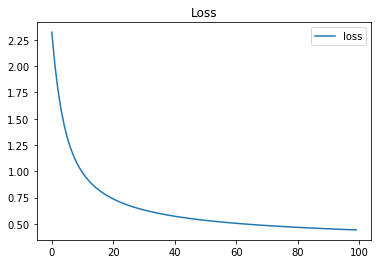

In [18]:
plt.figure()
plt.plot(losses, label="loss")
plt.title("Loss")
plt.legend()
plt.show()

In [19]:
with torch.no_grad():
    test_corrects = 0
    test_total = 0
    
    outputs = model(X_test)
    _, predictions = torch.max(outputs, axis=1)
    test_corrects += (y_test == predictions).sum().item()
    test_total += X_test.size(0)
    print("Test accuracy : ", (test_corrects / test_total) * 100, "%")

Test accuracy :  89.14999999999999 %
